PROJECT NAME : SUPERVISED MULTI LINEAR REGRESSION MODEL AND EVALUATE THE RESULTS

TITLE : CAR PRICE PREDICTION FOR MACHINE LEARNING MODEL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
raw = files.upload()

Saving dataset_poc2.csv to dataset_poc2.csv


**DATA PREPROCESSING**

EDA - EXPLORITARY DATA ANALYSIS

In [ ]:
#DATA CONVERT TO DATA FRAME
df = pd.read_csv("dataset_poc2.csv")

In [ ]:
df.shape

(203, 16)

In [ ]:
df.columns

Index(['car_name', 'reviews_count', 'fuel_type', 'engine_displacement',
       'no_cylinder', 'seating_capacity', 'transmission_type',
       'fuel_tank_capacity', 'body_type', 'rating', 'starting_price',
       'ending_price', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp',
       'max_power_rp'],
      dtype='object')

In [ ]:
df.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


In [ ]:
df.tail()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
198,Mercedes-Benz AMG A 45 S,35,Petrol,1991,4,5.0,Automatic,0.0,Hatchback,4.5,659000,999000,500.0,5250,415.71,6750
199,BMW 3 Series Gran Limousine,3,Petrol,1998,4,5.0,Automatic,59.0,Sedan,4.5,1041000,1041000,400.0,4400,254.79,5000
200,MG Hector Plus,2,Diesel,1956,4,7.0,Manual,60.0,SUV,4.5,1615000,2075000,350.0,2500,167.67,3750
201,Audi RS Q8,9,Petrol,3998,8,5.0,Automatic,85.0,SUV,3.5,21700000,21700000,800.0,4500,591.39,6000
202,Maruti Alto 800 tour,4,Petrol,796,3,5.0,Manual,35.0,Hatchback,4.5,391000,397000,69.0,3500,47.33,6000


In [ ]:
df[121:125]

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
121,Mercedes-Benz AMG GT,16,Petrol,3982,8,2.0,Automatic,75.0,Coupe,4.5,27100000,27100000,700.0,5500,576.63,6250
122,Lexus ES,31,Petrol,2487,4,5.0,Automatic,65.0,Sedan,4.5,5950000,6560000,202.0,5200,214.56,5700
123,Porsche Taycan,8,Electric,0,0,5.0,Electric,0.0,Wagon,4.5,15300000,23400000,650.0,0,482.76,0
124,Lexus LS,3,Petrol,3456,6,4.0,Automatic,82.0,Sedan,4.5,19100000,22200000,350.0,5100,354.00,6600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             203 non-null    object 
 1   reviews_count        203 non-null    int64  
 2   fuel_type            203 non-null    object 
 3   engine_displacement  203 non-null    int64  
 4   no_cylinder          203 non-null    int64  
 5   seating_capacity     202 non-null    float64
 6   transmission_type    203 non-null    object 
 7   fuel_tank_capacity   203 non-null    float64
 8   body_type            203 non-null    object 
 9   rating               203 non-null    float64
 10  starting_price       203 non-null    int64  
 11  ending_price         203 non-null    int64  
 12  max_torque_nm        203 non-null    float64
 13  max_torque_rpm       203 non-null    int64  
 14  max_power_bhp        203 non-null    float64
 15  max_power_rp         203 non-null    int

In [ ]:
#TO CHECK MISSING VALUES
df.isnull().sum()

car_name               0
reviews_count          0
fuel_type              0
engine_displacement    0
no_cylinder            0
seating_capacity       1
transmission_type      0
fuel_tank_capacity     0
body_type              0
rating                 0
starting_price         0
ending_price           0
max_torque_nm          0
max_torque_rpm         0
max_power_bhp          0
max_power_rp           0
dtype: int64

In [ ]:
#CONVERT CATEGORICAL VARIABLES TO NUMERICAL USING ONE-HOT ENCODING
Encode = pd.get_dummies(df, columns=['car_name','fuel_type','transmission_type','body_type'])

In [ ]:
Encode

,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,...,body_type_Coupe,body_type_Hatchback,body_type_Hybrid,body_type_Luxury,body_type_MUV,body_type_Minivan,body_type_Pickup Truck,body_type_SUV,body_type_Sedan,body_type_Wagon
0,51,998,3,5.0,27.0,4.5,399000,583000,89.0,3500,...,0,1,0,0,0,0,0,0,0,0
1,86,1462,4,5.0,48.0,4.5,799000,1396000,136.8,4400,...,0,0,0,0,0,0,0,1,0,0
2,242,2184,4,4.0,57.0,4.5,1353000,1603000,300.0,2800,...,0,0,0,0,0,0,0,1,0,0
3,313,2198,4,7.0,60.0,4.5,1318000,2458000,450.0,2800,...,0,0,0,0,0,0,0,1,0,0
4,107,2198,4,7.0,57.0,4.5,1199000,2390000,400.0,2750,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,35,1991,4,5.0,0.0,4.5,659000,999000,500.0,5250,...,0,1,0,0,0,0,0,0,0,0
199,3,1998,4,5.0,59.0,4.5,1041000,1041000,400.0,4400,...,0,0,0,0,0,0,0,0,1,0
200,2,1956,4,7.0,60.0,4.5,1615000,2075000,350.0,2500,...,0,0,0,0,0,0,0,1,0,0
201,9,3998,8,5.0,85.0,3.5,21700000,21700000,800.0,4500,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#HANDLE MISSING VALUES
new_df = Encode.dropna()

In [ ]:
new_df.describe()

,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,...,body_type_Coupe,body_type_Hatchback,body_type_Hybrid,body_type_Luxury,body_type_MUV,body_type_Minivan,body_type_Pickup Truck,body_type_SUV,body_type_Sedan,body_type_Wagon
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02,2.020000e+02,202.000000,202.000000,...,202.000000,202.000000,202.00000,202.000000,202.000000,202.00000,202.000000,202.000000,202.000000,202.000000
mean,119.267327,2297.564356,4.693069,5.014851,46.015842,4.433168,9.267619e+06,1.095233e+07,401.680099,3363.074257,...,0.103960,0.128713,0.00495,0.009901,0.044554,0.00495,0.019802,0.420792,0.212871,0.009901
std,315.002374,1492.784722,2.534312,1.161050,28.918283,0.280793,1.336973e+07,1.537045e+07,237.162281,1581.316241,...,0.305967,0.335714,0.07036,0.099256,0.206836,0.07036,0.139665,0.494913,0.410354,0.099256
min,1.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.390000e+05,3.610000e+05,16.100000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1334.750000,4.000000,5.000000,32.750000,4.500000,9.432500e+05,1.407250e+06,200.500000,2500.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,14.500000,1991.000000,4.000000,5.000000,50.000000,4.500000,4.256000e+06,4.595000e+06,360.000000,3500.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,2995.750000,6.000000,5.000000,66.000000,4.500000,1.157500e+07,1.552500e+07,580.000000,4500.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
max,2392.000000,6750.000000,12.000000,8.000000,100.000000,5.000000,7.060000e+07,9.000000e+07,1020.000000,7000.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#SPLIT DATA INTO X VALUES OR INDEPENDENT VARIABLES
x = new_df.iloc[:,:7].join(new_df.iloc[:,8:])
x

,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,starting_price,max_torque_nm,max_torque_rpm,max_power_bhp,...,body_type_Coupe,body_type_Hatchback,body_type_Hybrid,body_type_Luxury,body_type_MUV,body_type_Minivan,body_type_Pickup Truck,body_type_SUV,body_type_Sedan,body_type_Wagon
0,51,998,3,5.0,27.0,4.5,399000,89.0,3500,65.71,...,0,1,0,0,0,0,0,0,0,0
1,86,1462,4,5.0,48.0,4.5,799000,136.8,4400,101.65,...,0,0,0,0,0,0,0,1,0,0
2,242,2184,4,4.0,57.0,4.5,1353000,300.0,2800,130.00,...,0,0,0,0,0,0,0,1,0,0
3,313,2198,4,7.0,60.0,4.5,1318000,450.0,2800,182.38,...,0,0,0,0,0,0,0,1,0,0
4,107,2198,4,7.0,57.0,4.5,1199000,400.0,2750,172.45,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,35,1991,4,5.0,0.0,4.5,659000,500.0,5250,415.71,...,0,1,0,0,0,0,0,0,0,0
199,3,1998,4,5.0,59.0,4.5,1041000,400.0,4400,254.79,...,0,0,0,0,0,0,0,0,1,0
200,2,1956,4,7.0,60.0,4.5,1615000,350.0,2500,167.67,...,0,0,0,0,0,0,0,1,0,0
201,9,3998,8,5.0,85.0,3.5,21700000,800.0,4500,591.39,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#SPLIT DATA INTO Y VALUES OR DEPENDENT VARIABLES
y=new_df.iloc[:,7]
y

0        583000
1       1396000
2       1603000
3       2458000
4       2390000
         ...   
198      999000
199     1041000
200     2075000
201    21700000
202      397000
Name: ending_price, Length: 202, dtype: int64

In [ ]:
#TO SPLIT DATA INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 583000)

In [ ]:
#STANDARDIZE THE FEATURES
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[-0.37135946,  0.51109611,  0.58677123, ..., -0.96514602,
        -0.48666426, -0.08451543],
       [-0.31922006, -0.24854946, -0.30284967, ...,  1.03611264,
        -0.48666426, -0.08451543],
       [ 1.45351975, -0.62247208, -0.30284967, ..., -0.96514602,
         2.05480467, -0.08451543],
       ...,
       [-0.37135946, -0.81791487, -0.30284967, ..., -0.96514602,
         2.05480467, -0.08451543],
       [-0.21768543, -0.81643983, -0.74766011, ..., -0.96514602,
        -0.48666426, -0.08451543],
       [ 0.25156923, -0.96394383, -0.74766011, ...,  1.03611264,
        -0.48666426, -0.08451543]])

In [ ]:
y_train

168    35000000
74      4450000
57      1198000
165     4400000
202      397000
         ...   
192     5590000
173    12400000
188    25700000
29       806000
38      1062000
Name: ending_price, Length: 141, dtype: int64

In [ ]:
#MODEL TRAINING - MULTI LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

In [ ]:
A = LinearRegression()
A.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
x_test_scaled

array([[ 0.18845311, -0.81791487, -0.30284967, ..., -0.96514602,
        -0.48666426, -0.08451543],
       [-0.35215021, -1.70072628, -2.08209145, ..., -0.96514602,
         2.05480467, -0.08451543],
       [ 1.08579972, -0.89977959, -0.30284967, ..., -0.96514602,
        -0.48666426, -0.08451543],
       ...,
       [-0.36587111, -0.22716138, -0.30284967, ..., -0.96514602,
         2.05480467, -0.08451543],
       [-0.35763857,  1.17707664,  1.47639212, ..., -0.96514602,
        -0.48666426, -0.08451543],
       [-0.08047646, -0.07965739, -0.30284967, ...,  1.03611264,
        -0.48666426, -0.08451543]])

In [ ]:
#MODEL EVALUATION - PREDICTION ON TEST SET
y_predict = A.predict(x_test_scaled)

In [ ]:
y_predict

array([ -3201644.64895984,   9792607.99301046, -40490523.24599928,
       -10585120.64184126, -12997429.84250837,  35947294.22165661,
        15458875.14320658,  30302103.79072395,  17413550.64010786,
        37431470.41363847,  15535622.5839987 ,  19208753.37843216,
       -16650036.81646033,  31453428.08556005,  36730924.31402218,
         1105418.53681515,  10838413.71108198,  20901840.0057794 ,
        30681760.77565761,  19215081.74791218,  17782278.95117296,
        19967397.84617861,  25558502.69587664,  11744724.64724643,
        29227327.17129067,  19355969.00086381,  16897783.06452212,
       -35386064.56146423,  34953212.2814436 , -44491224.78032799,
          503726.79168132,  24650983.78235852,  19816114.98554236,
        48912498.60150723,  14587333.11553487,  21475624.01245244,
        10842173.48761295,  29838716.13771222,  13723757.87670074,
        56045578.93527224,  15455950.11727082,  -8140043.34750996,
        15865009.85005742, -21859780.74763288,  21718788.29678

In [ ]:
y_test

9        885000
98      6990000
58       642000
87      1544000
39       599000
         ...   
44      2025000
153    19300000
199     1041000
161    12500000
4       2390000
Name: ending_price, Length: 61, dtype: int64

In [ ]:
#EVALUATE THE MODEL'S PERFORMANCE
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test,y_predict)

In [ ]:
mse

299346369093386.25

In [ ]:
r2

-0.07510507637393782

Text(0.5, 1.0, 'True Price vs Predicted Price')

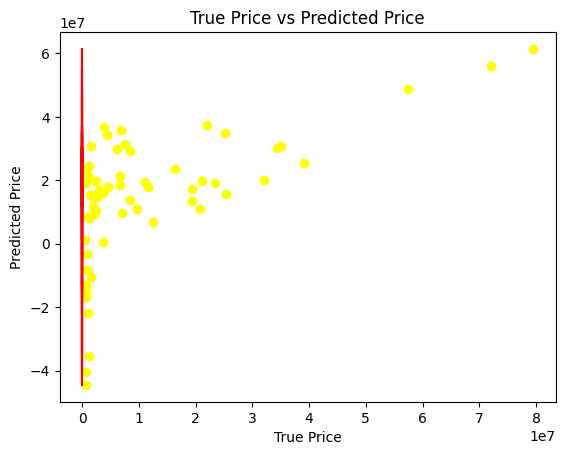

In [ ]:
#VISUALIZE THE RESULTS
plt.scatter(y_test,y_predict,color="yellow")
plt.plot(y_predict,color = "red")
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("True Price vs Predicted Price")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe7d8570d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe7d857610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe7d856e30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe7d857b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe7d857df0>],
 'means': []}

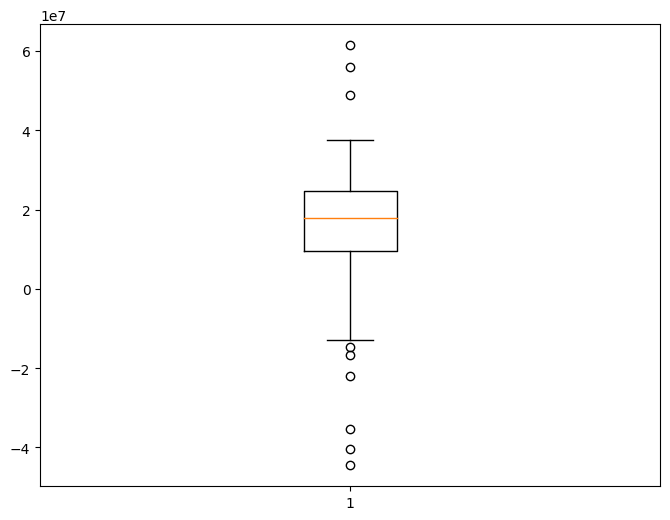

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(y_predict)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe7d8e9870>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe7d8e9db0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe7d8e95d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe7d8ea2f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe7d8ea590>],
 'means': []}

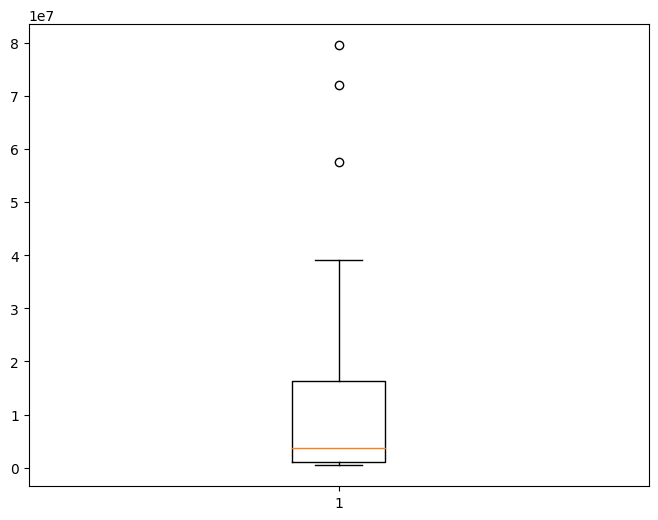

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(y_test)

In [ ]:
y_predict_df=pd.DataFrame({"Actual_Value":y_test,"Predicted value":y_predict,"Difference":y_test-y_predict})
y_predict_df

,Actual_Value,Predicted value,Difference
200,2075000,-1.006168e+07,1.213668e+07
191,3695000,-5.993102e+06,9.688102e+06
31,700000,-5.234517e+06,5.934517e+06
48,772000,1.494054e+07,-1.416854e+07
63,3680000,1.861242e+04,3.661388e+06
...,...,...,...
117,5090000,-5.103809e+06,1.019381e+07
104,7450000,-1.690663e+06,9.140663e+06
125,69500000,7.609603e+07,-6.596027e+06
27,1549000,-1.022163e+07,1.177063e+07
